## Observations and Insights 

1. Capomulin and Ramicane regimens have the lowest mean, media, variance, Standard Deviation, and SEM of the tumor volume (see Summary Statistics). However, Capomulin and Ramicane regimens had the largest number of mice in their cohort.

2. The interquartile range (IQR) is a measure of where the bulk of the values lie. Both the Capomulin and Ramacine regimer groups did not have any outliers and the range between the lower and Upper Bounds of the Ramcine group were larger than in the Capomulin group. The IQR shows that Capomulin (IQR=7.78) is slightly more effective than Ramicane (IQR = 9.09) in reducing tumor volume. 

3. The correlation between weight and average tumor volume on the Capomulin regimen was 0.84. This high correlation value shows a strong positive correlation between mose weight and average tumor volume, which suggests that the heavier the mouse, the less effective the drug regimen is (see scatter plot with linear regression). 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = pd.DataFrame(duplicate_mice)
duplicate_mouse_id

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dup = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = dropped_dup["Mouse ID"].value_counts()
total_mice = len(total_mice)
total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = dropped_dup.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = dropped_dup.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance = dropped_dup.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std = dropped_dup.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = dropped_dup.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance":variance, "Standard Deviation": std, "SEM": sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
group_by = dropped_dup.groupby('Drug Regimen')
summary_by_agg = group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_by_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment Regimen')

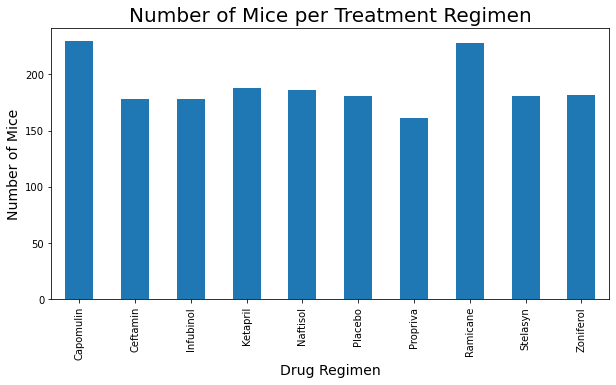

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 
plot_pandas = total_measurements.plot(kind="bar", figsize=(10,5))
plot_pandas.set_xlabel("Drug Regimen", fontsize=14)
plot_pandas.set_ylabel("Number of Mice",  fontsize=14)
plot_pandas.set_title("Number of Mice per Treatment Regimen", fontsize=20)

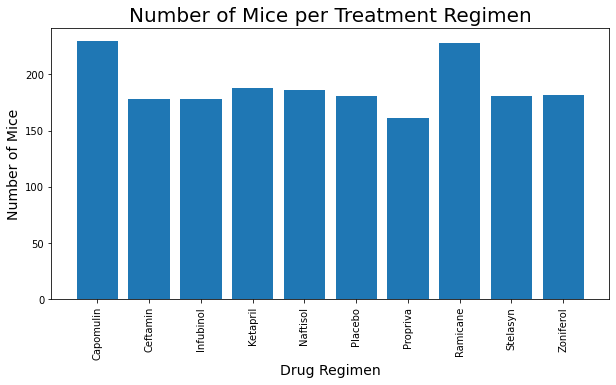

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(total_measurements))
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(x_axis, total_measurements, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.title("Number of Mice per Treatment Regimen",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.show()

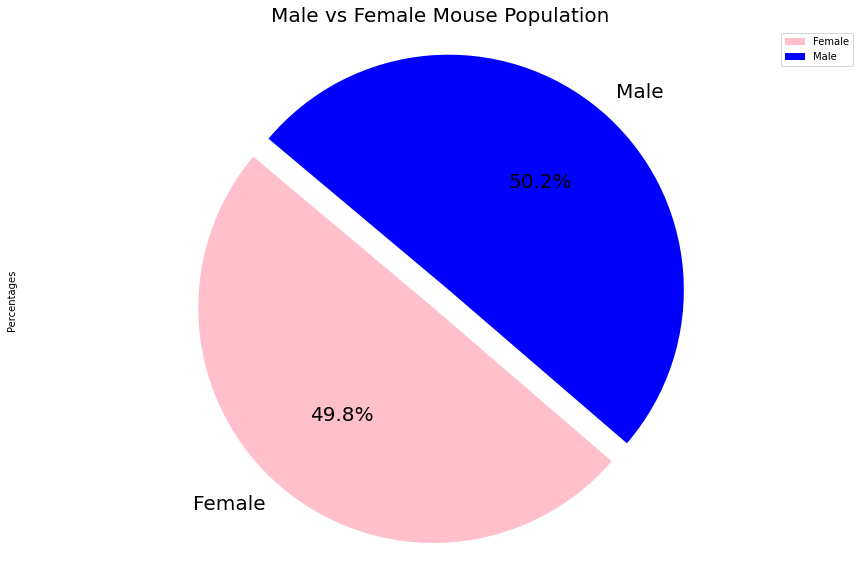

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group by gender and get the number to plot
groupby_gender = combined_data.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

# Create dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Percentages"]
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Percentages"]/mouse_gender["Percentages"].sum()))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# Generate pie plot
plot = mouse_gender.plot.pie(y='Percentages',figsize=(15,10), colors = ('pink', 'blue'), startangle=140, explode = (0.1, 0), autopct="%1.1f%%", fontsize=20)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.axis('equal')
plt.show()

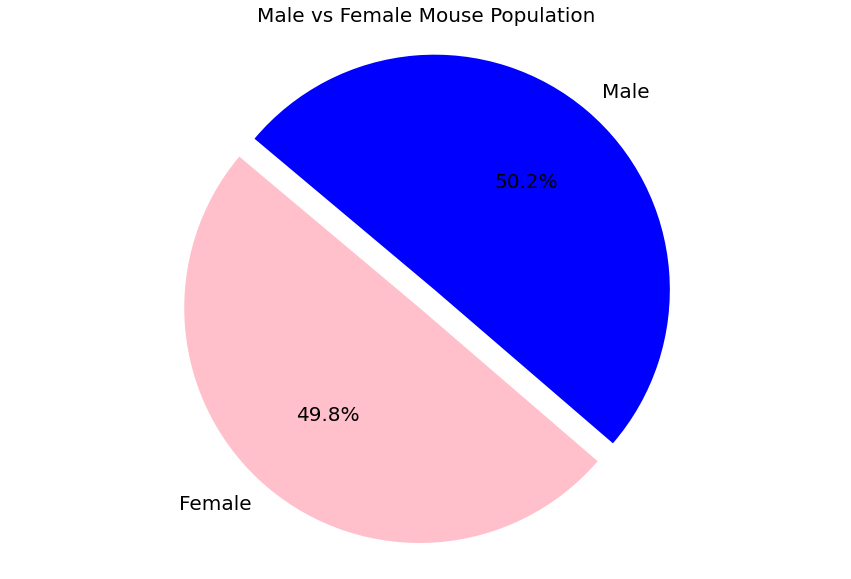

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
percentages = (49.8,50.20)
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(percentages, explode=(0.1, 0),labels=("Female","Male"), colors=('pink', 'blue'), autopct="%1.1f%%", startangle=140, textprops={'fontsize': 20})
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp = pd.DataFrame(combined_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
merged = pd.merge(combined_data, max_tp, on='Mouse ID')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:

    tumor_vol= merged.loc[merged['Drug Regimen'] == drug]
    final_volume = tumor_vol.loc[tumor_vol['Timepoint'] == tumor_vol['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    outliers_count = (values.loc[(final_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


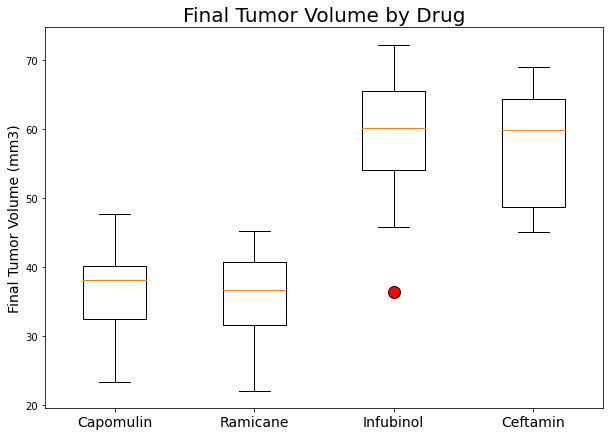

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.boxplot(drug_values, flierprops = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black'))
plt.title('Final Tumor Volume by Drug', fontsize = 20)
plt.ylabel('Final Tumor Volume (mm3)', fontsize = 14)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize = 14)
plt.show()

## Line and Scatter Plots

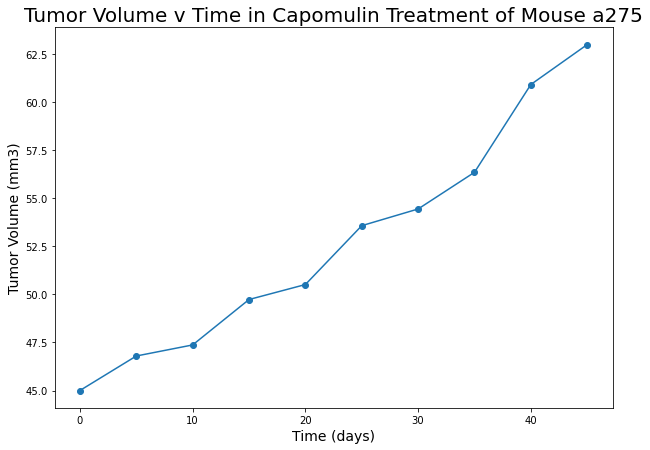

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = combined_data.loc[combined_data['Mouse ID'] == 'a275']
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.title("Tumor Volume v Time in Capomulin Treatment of Mouse a275", fontsize = 20)
plt.xlabel("Time (days)", fontsize = 14)
plt.ylabel("Tumor Volume (mm3)", fontsize = 14)
plt.show()

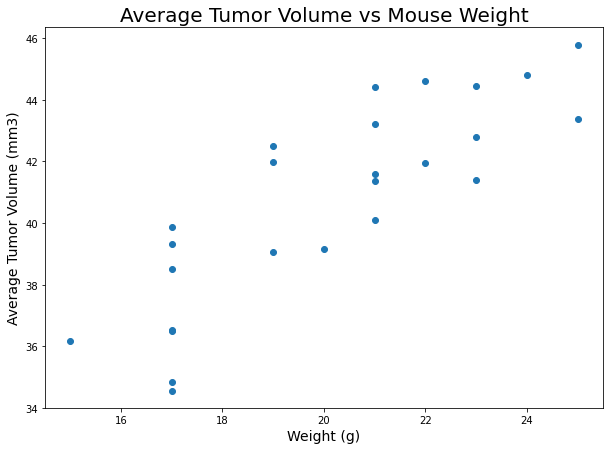

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_vol = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol = avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
fig, ax1 = plt.subplots(figsize=(10, 7))

x = final_avg_vol['Weight (g)']
y = final_avg_vol['avg_tumor_vol']
plt.scatter(x, y)

plt.title('Average Tumor Volume vs Mouse Weight', fontsize = 20)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 14)
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


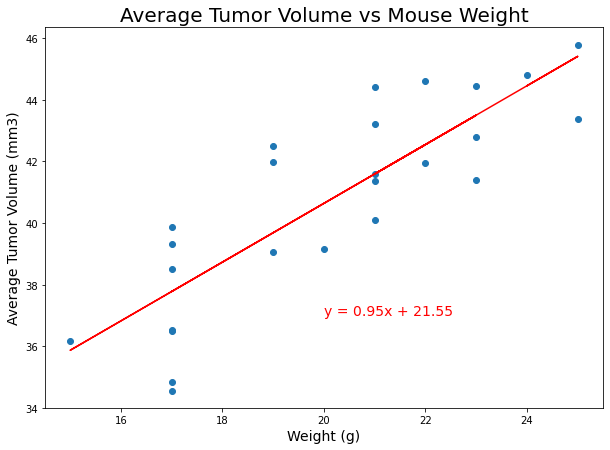

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=14,color="red")
plt.title('Average Tumor Volume vs Mouse Weight', fontsize = 20)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 14)
plt.show()